<span class='note'><i>Make me look good.</i> Click on the cell below and press <kbd>Ctrl</kbd>+<kbd>Enter</kbd>.</span>

In [1]:
from IPython.core.display import HTML
HTML(open('css/custom.css', 'r').read())

<h5 class='prehead'>SM286D &middot; Introduction to Applied Mathematics with Python &middot; Spring 2020 &middot; Uhan</h5>

<h5 class='lesson'>Lesson 12.</h5>

<h1 class='lesson_title'>Graph theory with Python</h1>

## This lesson...

- Introduction to graph theory

- Using NetworkX to compute measures of centrality/influence
     - Degree centrality
     - Closeness centrality
     - Betweenness centrality

---

## Introduction to graph theory

- __Graphs__ model how various entities are connected.

- Graphs have numerous and diverse applications throughout operations research, including in utility planning, job scheduling, task assignment, and modeling networks. 

- Graphs are a central focus of SM342, our class in discrete mathematics (a math or breadth elective in the Operations Research major). 

- A __graph__ $G = (V,E)$ consists of 
    - a set of __vertices__ $V$ (also called __nodes__), and 
    - a set $E$ of pairs of vertices. 
    
- In an __undirected__ graph, each pair $(v_1, v_2) \in E$ is an __edge__ with endpoints $v_1$ and $v_2$.
    - For edges, direction doesn't matter: the edges $(v_1,v_2)$ and $(v_2,v_1)$ are the same.
    - We use line segments to draw edges.
    
- In a __directed__ graph, each pair $(v_1, v_2) \in E$ is an __arc__ that starts at $v_1$ and ends at $v_2$.
    - For arcs, direction matters: the arcs $(v_1, v_2)$ and $(v_2, v_1)$ are NOT the same.
    - We use arrows to draw arcs.

- Figure 1 shows an example of an undirected graph $G$.

<img src="img/graph.png" alt="Drawing" width="40%"/>
<center> Figure 1. The graph of $G$. </center>

__Example.__ Is $(0, 1)$ an edge of $G$? Is $(0, 2)$ an edge of $G$?

_Write your notes here. Double-click to edit._

- For this lesson, we will focus on undirected graphs &mdash; we will simply call them graphs.

- We often describe a graph by its __adjacency matrix__ $A$: a square matrix with one row and one column for each node, where

\begin{equation*}
A_{ij} = \begin{cases}
1 & \text{if } (i, j) \text{ is an edge of } G\\
0 & \text{otherwise}
\end{cases}
\end{equation*}

- The adjacency matrix for $G$ in Figure 1 is 
\begin{equation*}
A = \begin{bmatrix}  0 & 1 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 \\
0 & 1 & 1 & 0 & 1 \\
0 & 0 & 0 & 1 & 0  \end{bmatrix}.
\end{equation*}


- The __degree__ of a node $v$ is the number of edges that contain $v$.
    - In Figure 1, you can see the degree of a node by seeing how many edges come out of it.

__Example.__ What is the degree of node 3 in graph $G$ in Figure 1?

_Write your notes here. Double-click to edit._

- A __path__ is a sequence of nodes $(v_1,v_2,v_3,\ldots,v_n)$ such that subsequent nodes $(v_i,v_{i+1})$ form an edge in $G$. 

- The __length of a path__ is the number of edges it contains. 

__Example.__ Consider the graph $G$ in Figure 1. Give an example of a path from node 0 to node 4. What is its length? What is the shortest path from node 0 to node 4?

_Write your notes here. Double-click to edit._

---

## Using NetworkX to compute measures of centrality/influence

- In today's lesson and Project 5, we will be using Python to compute measures of centrality/influence in social networks.  

- Consider the following example.

__Example.__ Suppose Ann, Dan, Dave, Eve, Jay, Jen, Joe, and Sara are all on Facebook. Ann is friends with Eve and Jay; Dan is friends with Dave, Jen, Joe, and Sara; Dave is friends with Jay, Joe, and Dan; Eve is friends with Ann and Jay; Jay is friends with Ann, Eve, Dave, and Sara; Jen is friends with Dan, Dave, and Sara; Joe is friends with Dan and Dave; and Sara is friends with Dan, Jay, and Jen. 

- This is a lot of words to explain the connections between these individuals.  

- It might be better to illustrate their relationships with a graph. See Figure 2 below.

<img src="img/social_network_leg.png" alt="Drawing" style="width: 80%"/>

<center> Figure 2. Social network example. </center>

- __[NetworkX](https://networkx.github.io)__ is a Python package that lets us work with graphs.
    - [Here is the NetworkX documentation.](https://networkx.github.io/documentation/stable/index.html)

- Let's start with importing `networkx`:

In [2]:
import networkx as nx

- Next we define an empty graph `G`, followed by the list of nodes and edges:

In [3]:
# Define an empty graph
G = nx.Graph()

# Define the list of nodes
nodes = ['Ann', 'Dan', 'Dave', 'Eve', 'Jay', 'Jen', 'Joe', 'Sara']

# Define the list of edges
# Note that each edge is a list
edges = [['Jay', 'Dave'], ['Sara', 'Dan'], ['Dan', 'Jen'], ['Eve', 'Ann'],
        ['Sara', 'Jen'], ['Jay', 'Ann'], ['Joe', 'Dave'], ['Jay', 'Eve'],
        ['Jen', 'Dave'], ['Jay', 'Sara'], ['Joe', 'Dan'], ['Dan', 'Dave']]

- We can add `nodes` and `edges` to the graph `G` like this:

In [4]:
# Add nodes to G
G.add_nodes_from(nodes)

# Add edges to G
G.add_edges_from(edges)

- Now that we've defined the network, a natural question to ask is: 

<center><em>Which individual is the most central/influential of the group?</em></center>

- There are many ways to measure this. We will discuss three of them here.

### Degree centrality

- Recall that the degree of a node is the number of edges containing that node.

- Figure 3 below shows our social network example with the degree of each node listed next to it.

<img src="img/social_network_deg.png" alt="Drawing" width="80%"/>

<center> Figure 3. Social network example with node degrees. </center>

- The __degree centrality__ of a node is defined as the node's degree divided by the maximum possible degree.  

- The maximum possible degree is given by $N-1$, where $N$ is the total number of nodes in the graph.
    - For our example, the maximum possible degree is 7.  

- Figure 4 below shows our social network with the degree centrality of each node listed next to it.

<img src="img/social_network_deg_centrality.png" alt="Drawing" width="80%"/>
<center> Figure 4. Social network example with node degree centrality values. </center>

- To compute the degree centrality of each node in a graph using NetworkX, we can do this:

In [5]:
# Compute degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Check our work
print(degree_centrality)

{'Ann': 0.2857142857142857, 'Dan': 0.5714285714285714, 'Dave': 0.5714285714285714, 'Eve': 0.2857142857142857, 'Jay': 0.5714285714285714, 'Jen': 0.42857142857142855, 'Joe': 0.2857142857142857, 'Sara': 0.42857142857142855}


- We see that `nx.degree_centrality()` returns a dictionary.

- Let's print this information nicely:

In [6]:
# Print degree centrality for each node
for key, value in degree_centrality.items():
    print(f'{key} has degree centrality {value:.3f}.')

Ann has degree centrality 0.286.
Dan has degree centrality 0.571.
Dave has degree centrality 0.571.
Eve has degree centrality 0.286.
Jay has degree centrality 0.571.
Jen has degree centrality 0.429.
Joe has degree centrality 0.286.
Sara has degree centrality 0.429.


### Closeness centrality

- Another way to measure the centrality/influence of a member of the network is _closeness centrality_.

- In order to define closeness centrality, we begin by looking at the _shortest path distance_ between two nodes.  

- The __shortest path distance__ between two nodes is simply the length of a shortest path between the two nodes.

- Let's use Jay as the starting node, and find the shortest path from Jay to all the other nodes in the graph.  
    - This process is illustrated in Figure 5 below.

<img src="img/closeness.gif" alt="Drawing" width="80%"/>

<center> Figure 5. Finding shortest paths between nodes in our social network example. </center>

- Next we find the sum of the shortest path distances from Jay to all the other nodes:

    \begin{equation*}
    1 + 1 + 1 + 2 + 2 + 2 + 1 = 10
    \end{equation*}

- The __closeness__ $c$ of a node measures how close it is to every other node.

- The closeness of the node Jay is given by

    \begin{equation*}
    c(\text{Jay}) = \frac{1}{\sum_{i} d(i,\text{Jay})} = \frac{1}{10}
    \end{equation*}

    where $d(i,\rm{Jay})$ is the shortest path distance from node $i$ to node $\rm{Jay}$.

- The __closeness centrality__ of the node Jay is 

    \begin{equation*}
    C(\text{Jay}) = (N-1)c(\text{Jay})
    \end{equation*}
    
    where $N$ is the total number of nodes in the graph. 

- For our example, the closeness centrality of node Jay is

    \begin{equation*}
    C(\text{Jay}) = (N - 1) c(\text{Jay}) = (8-1) \frac{1}{10} = \frac{7}{10}
    \end{equation*}

- Figure 6 below shows our social network example with the closeness centrality of each node listed next to it.

<img src="img/closeness_centrality.png" alt="Drawing" style="width:80%;"/>

<center> Figure 6. Closeness centrality values for our social network example. </center>

- To compute the closeness centrality of each node in a graph using NetworkX, we can do this:

In [7]:
# Compute closeness centrality for each node
closeness_centrality = nx.closeness_centrality(G)

# Check our work
print(closeness_centrality)

{'Ann': 0.4666666666666667, 'Dan': 0.5833333333333334, 'Dave': 0.7, 'Eve': 0.4666666666666667, 'Jay': 0.7, 'Jen': 0.5384615384615384, 'Joe': 0.5, 'Sara': 0.6363636363636364}


- Like `nx.degree_centrality()`, `nx.closeness_centrality()` also returns a dictionary.

- Let's print this information nicely:

In [8]:
# Print closeness centrality for each node
for key, value in closeness_centrality.items():
    print(f'{key} has closeness centrality {value:.3f}.')

Ann has closeness centrality 0.467.
Dan has closeness centrality 0.583.
Dave has closeness centrality 0.700.
Eve has closeness centrality 0.467.
Jay has closeness centrality 0.700.
Jen has closeness centrality 0.538.
Joe has closeness centrality 0.500.
Sara has closeness centrality 0.636.


### Betweenness centrality

- Yet another way to measure the centrality/influence of a member of the network is _betweenness centrality_.  

- The __betweenness centrality__ of a node measures how often it is on the shortest path between two other nodes. 

- This is illustrated in Figure 7 below where we are looking at shortest paths from Dave to other nodes.  
    - We see that Jay is on the shortest path from Dave to Eve and Dave to Sara, but Jay is not on the shortest path from Dave to Dan.

<img src="img/betweenness.png" alt="Drawing" style="width:80%;"/>

<center> Figure 7. Betweenness illustration for our social network example. </center>

- To compute the betweenness centrality of each node in a graph using NetworkX, we can do this:

In [9]:
# Compute betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Check our work
print(betweenness_centrality)

{'Ann': 0.0, 'Dan': 0.08730158730158728, 'Dave': 0.30952380952380953, 'Eve': 0.0, 'Jay': 0.492063492063492, 'Jen': 0.015873015873015872, 'Joe': 0.0, 'Sara': 0.14285714285714285}


- Yup, `nx.betweenness_centrality()` also returns a dictionary.

- Let's print this information nicely:

In [10]:
# Print betweenness centrality for each node
for key, value in betweenness_centrality.items():
    print(f'{key} has betweenness centrality {value:.3f}.')

Ann has betweenness centrality 0.000.
Dan has betweenness centrality 0.087.
Dave has betweenness centrality 0.310.
Eve has betweenness centrality 0.000.
Jay has betweenness centrality 0.492.
Jen has betweenness centrality 0.016.
Joe has betweenness centrality 0.000.
Sara has betweenness centrality 0.143.


- Figure 8 below shows our social network example with the betweenness centrality of each node listed next to it.

<img src="img/betweenness_centrality.png" alt="Drawing" style="width:80%;"/>

<center> Figure 8. Betweenness centrality values for our social network example. </center>

### So... who is the most central/influential of the group?

- As usual, the answer is, "it depends". 

- In particular, it depends on which measure you want to use.

- The table below summarizes the results from the three measures we explored above.

| Degree Centrality | Closeness Centrality | Betweenness Centrality |
|:--- |:--- |:--- |
| 1. Dan - 0.571 | 1. Dave - 0.700 | 1. Jay - 0.492 |
| 2. Dave - 0.571 | 2. Jay - 0.700 | 2. Dave - 0.310 |
| 3. Jay - 0.571 | 3. Sara - 0.636 | 3. Sara - 0.143 |

---

## Classwork

__Problem 1.__ In the code below, we first define the adjacency matrix of a graph with NumPy. Note the way that we filled in a different row of $A$ on each of lines 6 through 10. For example, on line 7 we filled row 1 by setting $A_{10} = A_{12} = A_{13} = 1$.

On line 13, we use the adjacency matrix $A$ to define the graph $G$. Note that this is different from how we defined a graph in the lesson above. We get a list of the nodes of $G$ on line 14 and a list of the edges of $G$ on line 15.

In [11]:
import numpy as np
import networkx as nx

# Define adjacency matrix
A = np.zeros([5,5])
A[0, [1]] = 1
A[1, [0, 2, 3]] = 1
A[2, [1, 3]] = 1
A[3, [1, 2, 4]] = 1
A[4, [3]] = 1

# Define graph using NetworkX
G = nx.Graph(A)
nodes_list = list(G.nodes)
edges_list = list(G.edges)

Print the lists of nodes and edges to the screen. Make sure you understand why they look the way they do.

In [12]:
print(f'Nodes: {nodes_list}')
print(f'Edges: {edges_list}')

Nodes: [0, 1, 2, 3, 4]
Edges: [(0, 1), (1, 2), (1, 3), (2, 3), (3, 4)]


__Problem 2.__ You can draw a graph `G` with `nx.draw_networkx(G)`. Use this to draw the graph `G` defined in Problem 1. Do you see what you expected?

You may need to import the `matplotlib.pyplot` package as `plt` to get the drawing to work. 
Take a look at the [documentation](https://networkx.github.io/documentation/stable/index.html) if you need to. Try calling `nx.draw_networkx()` with the keyword arguments `with_labels=True` and `font_color='w'`. 

In [13]:
import matplotlib.pyplot as plt
nx.draw_networkx(G, with_labels=True, font_color='w')

__Problem 3.__ The graph `G` you defined in Problem 1 has a variety of methods and attributes. For example, the attribute `G.nodes` is a list-like object that contains all the nodes of `G`. As another example, the method `G.degree()` returns a data structure that contains the degree for each vertex: in particular, you can access the degree of vertex $j$ with `G.degree()[j]`.  Use a `for` loop to print a sentence like 

```
The degree of vertex 0 is 1.
``` 

for each vertex in `G`. 

In [14]:
for n in G.nodes: 
    print(f'The degree of vertex {n} is {G.degree()[n]}.')

The degree of vertex 0 is 1.
The degree of vertex 1 is 3.
The degree of vertex 2 is 2.
The degree of vertex 3 is 3.
The degree of vertex 4 is 1.


__Problem 4.__
You can find the vertices connected to vertex `v` in graph `G` with `G.neighbors(v)`. However, it returns a strange (`dict_keyiterator`) object. You can call `list()` on the result of `G.neighbors(v)` to turn it into something readable. 

Print the list of neighbors of vertex 2.

In [15]:
two_neighbors = list(G.neighbors(2))
print(f'The neighbors of node 2 are the elements of the list {two_neighbors}.')

The neighbors of node 2 are the elements of the list [1, 3].


__Problem 5.__
You can find the length of a shortest path from node 0 to node 4 with 

```python
nx.shortest_path_length(G, source=0, target=4)
```

In today's lesson, we called this the __shortest path distance__ between node 0 and node 4. The method `nx.shortest_path()` produces the path itself. 

Modify the code in Problem 1 to construct the adjacency matrix `B` for a new graph with edges (0, 1), (0, 3), (1, 2), (2, 3), and (3, 4). Let `H` be the graph with adjacency matrix `B`. Find the shortest path length between 1 and 4. Use the `nx.all_shortest_paths()` method to find all the shortest paths from node 1 to node 4 in `H`. Read the NetworkX documentation if you're not sure how to use `nx.all_shortest_paths()`.

In [16]:
# Define adjacency matrix
B = np.zeros([5,5])
B[0, [1, 3]] = 1
B[1, [0, 2]] = 1
B[2, [1, 3]] = 1
B[3, [0, 2, 4]] = 1
B[4, [3]] = 1

# Define graph using adjacency matrix
H = nx.Graph(B)

# Compute shortest path information
print(f'The shortest path distance from node 1 to node 4 is {nx.shortest_path_length(H, source=1, target=4)}')
print(f'The shortest paths from node 1 to node 4 are: ')
for i in nx.all_shortest_paths(H, source=1, target=4):
    print(i)

The shortest path distance from node 1 to node 4 is 3
The shortest paths from node 1 to node 4 are: 
[1, 0, 3, 4]
[1, 2, 3, 4]


__Problem 6.__
The graph `H` from the last problem is really a graph of friendships among five people. Create a `names` dictionary that maps node numbers as keys to names as values as follows: Suzie (node 0), Tom (node 1), Jamal (node 2), Heather (node 3), and Nitish (node 4).

In `H`, we see that Suzie is friends (separately) with Tom and Heather.  Print the two shortest paths from Tom to Nitish, using names rather than node numbers. Do this without hard coding your answer (i.e. refer to the `names` dictionary rather than writing names directly in your code). One of your paths should be: 

```
Tom - Jamal - Heather - Nitish
```

In [17]:
# Define dictionary that maps node numbers to names
names = {0: 'Suzie', 1: 'Tom', 2: 'Jamal', 3: 'Heather', 4: 'Nitish'}

# Print all shortest paths from Tom to Nitish,
# using names rather than node numbers
print('The shorest paths are: ')
for path in nx.all_shortest_paths(H, source=1, target=4):
    
    # Create list of names corresponding to path
    # I'm using a list comprehension here, but 
    # you can also use a for loop with .append()
    path_names = [names[n] for n in path]

    # Print the list of names, using .join() to format them nicely
    # See Problem 1 from Lesson 10 for more information about .join()
    print(' - '.join(path_names))

The shorest paths are: 
Tom - Suzie - Heather - Nitish
Tom - Jamal - Heather - Nitish


### Bonus classwork

The following problems are included as bonus material. Work on them only after completing the problems above.

__Problem 7 (Directed graphs).__
Directed graphs are used to model many different situations in operations research. There is a popular OR textbook, _Network Flows_ (by Ravindra K. Ahuja, Thomas L. Magnanti, and James B. Orlin), devoted to the topic and USNA often offers an elective course in this area. 

Network flow problems are defined on _directed_ graphs $(V, E)$: the set $E$ consists of arcs $(v_1, v_2)$ that allow flow from vertex $v_1$ to vertex $v_2$. Each vertex has an associated supply or demand, and each edge has an associated capacity and cost.

One type of network flow problem is the _maximum flow of minimum cost problem_. In this problem, we want to move as much flow along edges from a source vertex to a destination vertex, leaving nothing behind at any other vertex, while respecting the capacity constraints on the edges, and at minimum cost. The decision variables in this problem determine how much to flow along each edge of the network.

The code below solves a maximum flow of minimum cost problem using NetworkX on a directed graph (note the use of `DiGraph()`) where vertex 1 is the source and vertex 7 is the destination. On paper, draw a picture of the network, and label each edge with capacity/cost/flow, where flow comes from the solution to the problem. 

In [18]:
# Define empty directed graph
G = nx.DiGraph()

# Add edges to directed graph
# Note that NetworkX will add the corresponding nodes automatically
# Also note that some edges do not have 'capacity' defined: 
# read the documentation to understand what this means.
G.add_edges_from([(1, 2, {'capacity': 12, 'weight': 4}),
                  (1, 3, {'capacity': 20, 'weight': 6}),
                  (2, 3, {'capacity': 6, 'weight': -3}),
                  (2, 6, {'capacity': 14, 'weight': 1}),
                  (3, 4, {'weight': 9}),
                  (3, 5, {'capacity': 10, 'weight': 5}),
                  (4, 2, {'capacity': 19, 'weight': 13}),
                  (4, 5, {'capacity': 4, 'weight': 0}),
                  (5, 7, {'capacity': 28, 'weight': 2}),
                  (6, 5, {'capacity': 11, 'weight': 1}),
                  (6, 7, {'weight': 8}),
                  (7, 4, {'capacity': 6, 'weight': 6})])

# Find the max flow of min cost from vertex 1 to vertex 7
# Read the documentation to understand the structure of the 
# dictionary that nx.max_flow_min_cost returns.
min_cost_flow = nx.max_flow_min_cost(G, s=1, t=7)
print(min_cost_flow)

# Compute the cost of the max flow of min cost
min_cost = nx.cost_of_flow(G, min_cost_flow)
print(min_cost)

{1: {2: 12, 3: 16}, 2: {3: 0, 6: 14}, 3: {4: 6, 5: 10}, 6: {5: 11, 7: 3}, 4: {2: 2, 5: 4}, 5: {7: 25}, 7: {4: 0}}
373


<img src="img/Question_7_solutiona.jpg" alt="Drawing" style="width: 400px;"/>

__Problem 8 (Eulerian graphs)__. A path in an undirected graph $G$ is called _Eulerian_ if it uses all of the edges of $G$ precisely once. A path where the initial vertex and the last vertex are the same is called a _cycle_ or a _circuit_. A graph $G$ that has an Eulerian cycle (an Eulerian path that is also a cycle) is called an *Eulerian graph*, named after Leonhard Euler (look up the K&#246;nigsberg Bridge Problem if you are curious about how such graphs first appeared). 

Define a graph $P$ with six vertices 0, 1, 2, 3, 4 and 5 and edges (0, 1), (0, 3), (1, 2), (2, 3), (3, 4), (3, 5), (4, 5). Draw $P$ using NetworkX. Then convince yourself that $P$ is Eulerian. 

The code 

```
list(nx.eulerian_circuit(G))
```

produces an Eulerian cycle for a graph `G` if one exists. Use this code to check your work. Find the degree of each vertex in $P$. The degrees all share a common property; can you guess what it is? Make your guess and then check out the cell below for a fun fact about Eulerian graphs.

Eulerian circuit: [(0, 3), (3, 5), (5, 4), (4, 3), (3, 2), (2, 1), (1, 0)]
Degree of vertex 0: 2
Degree of vertex 1: 2
Degree of vertex 2: 2
Degree of vertex 3: 4
Degree of vertex 4: 2
Degree of vertex 5: 2
All the degrees are even!


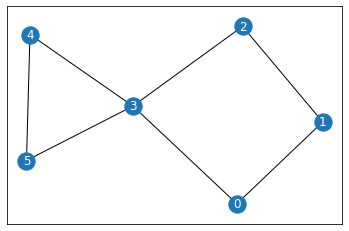

In [19]:
# Define adjacency matrix of P
C = np.zeros([6,6])
C[0, [1, 3]] = 1
C[1, [0, 2]] = 1
C[2, [1, 3]] = 1
C[3, [0, 2, 4, 5]] = 1
C[4, [3, 5]] = 1
C[5, [3, 4]] = 1

# Define graph P based on adjacency matrix
P = nx.Graph(C)

# Draw the graph
nx.draw_networkx(P, with_labels=True, font_color='w')

# Find an Eulerian circuit and print the output
print(f'Eulerian circuit: {list(nx.eulerian_circuit(P))}')

# Print the degree of every vertex
for i in P.nodes:
    print(f'Degree of vertex {i}: {P.degree()[i]}')

print('All the degrees are even!')

It turns out that every vertex in an Eulerian graph has even degree. In fact, if the graph is connected (any two vertices can be connected by a path) and every vertex has even degree, then the graph is also Eulerian!

__Problem 9 (Planarity).__
A (undirected) graph is called planar if it can be drawn in the plane without edges crossing (you are allowed to draw the graph edges as curved lines if you like). All the graphs we've seen so far have been planar graphs. 

Two non-planar graphs are $K_{5}$ and $K_{3,3}$. The graph $K_{5}$ is called the complete graph on 5 vertices. It has ... wait for it ... five vertices. And it is complete in the sense that every possible edge is in the graph: every pair of vertices is connected by an edge. 

The graph $K_{3,3}$ is an example of a complete bipartite graph. Such graphs have two kinds of vertices (call them blue and gold) and all possible edges between blue and gold vertices are present while no edges between vertices of the same color are present. The graph $K_{3,3}$ has 3 vertices of each color. 

In fact, in a precise sense, these are the only examples of non-planar graphs. It turns out that every other non-planar graph can be obtained from $K_5$ or $K_{3,3}$ by a combination of actions: adding edges between existing vertices, subdividing an existing edge by inserting a vertex on the edge, or adding new vertices. The Petersen graph is the graph pictured in Figure 9.

<img src="img/petersen.png" alt="Drawing" style="width: 60%;"/>

<center> Figure 9. The Petersen graph. </center>

It is a counterexample to many natural conjectures in graph theory. In the code below, we define the Petersen graph in NetworkX using `nx.petersen_graph()`, and draw the graph.

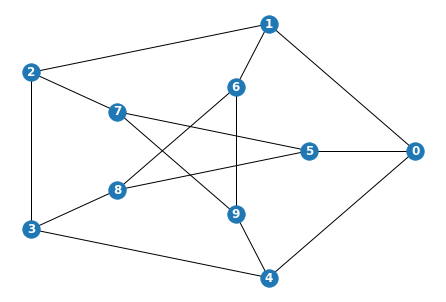

In [20]:
# Define Petersen graph in NetworkX
G = nx.petersen_graph()

# Draw the Petersen graph
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold', font_color='w')

Use the code below to learn whether the Petersen graph is planar or not. 

> *Note.*  You may need to update to the latest version of NetworkX to use `nx.check_planarity()`. To do that, go to the Anaconda Prompt (search in the Windows Start Menu) and then type 
>
> ```
> pip install networkx --upgrade
> ```
>
> You'll need to restart the kernel in Jupyter in order to access the new version of the package once it is installed.

In [21]:
# Check for planarity
nx.check_planarity(G)

(False, None)

On paper, can you build the Petersen graph from $K_{3,3}$ using the actions described above? 

<img src="img/Question_8_solution.jpg" alt="Drawing" style="width: 800px;"/>